<h1 style='color: green; font-size: 36px; font-weight: bold;'>Clusterização de Clientes para Concessão de Crédito 💳</h1>

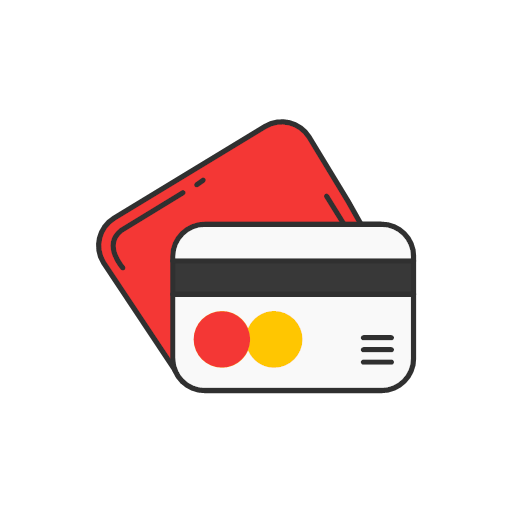

<h1 style='color: red; font-size: 30px; font-weight: bold;'>Problema de Negócio 🏦</h1>

👉 Temos um banco fictício que tem a intensão de conceder crédito para seus clientes, baseado nas informações que eles possuem sobre os mesmos.

👉 O objetivo do case é realizar a clusterização dos clientes, ou seja, o agrupamento dos clientes em grupos específicos que possam indicar para o banco se eles devem ou não conceder crédito à estas pessoas.

👉 O dataset em questão possui a variável target binária que indica como 0 - Clientes não arriscados e 1 - Clientes arriscados. O objetivo de realizar a clusterização é saber se o modelo é eficiente em realizar o MESMO agrupamento, ou se ele consegue encontrar outros grupos com diferentes características, que sejam importantes na avaliação do banco para saber se o cliente irá receber, ou não, o crédito.

👉 Utilizarei o algoritmo K-Means para testar se o modelo consegue segmentar os clientes em apenas 2 grupos, igual a variável target da base, e também testarei com valores diferentes de K para identificar possíveis outros grupos para segmentação da base dos clientes.

<h1 style='color: red; font-size: 30px; font-weight: bold;'>SUMÁRIO 📖</h1>

## 👉 1) Importando as Bibliotecas 💻
## 👉 2) Leitura do dataset 📂
## 👉 3) Limpeza e tratamento dos dados 📃
## 👉 4) Clusterização e avaliação do modelo 🤖 
## 👉 5) Análises e Extração de Insights 💡
## 👉 6) Conclusão 🎉

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>1) Importando as Bibliotecas 💻</h1>

In [135]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
from sklearn import metrics
import emojis
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>2) Leitura do dataset 📂</h1>

#### Features:

* conta_corrente: range de valores na conta corrente

* prazo_emprestimo_meses: Valor em meses de empréstimo

* historico_credito: Informação sobre pagamento dos créditos concedidos

* proposito_emprestimo: Motivo do empréstimo concedido

* valor_emprestimo: Valor que foi pego para empréstimo

* reserva_cc: Quantidade de valor guardado

* tempo_emprego_atual: Tempo em que o cliente se encontra empregado

* sexo_est_civil: Sexo e estado civil

* outros_fiadores: Tipos de fiadores

* anos_residencia_atual: Anos que possui uma residencia

* propriedade: Tipo de propriedade que possui

* Idade: Idade do cliente

* outros_planos_financiamento: Outros tipos de planos financeiros que o cliente possui

* tipo_residencia: Qual o tipo de residência

* n_creditos_banco: Quantas vezes pegou crédito do banco

* status_emprego: Status atual do emprego

* n_dependentes: Número de dependentes

* telefone: Se possui ou não telefone para contato

* trabalhador_estrangeiro: Se é ou não trabalhador estrangeiro

#### Target:

* default: Classifica o cliente como ARRISCADO (1) ou NÃO (0)

#### OBS: Só utilizaremos para comparação

In [2]:
# Setar a opção de visualização para todas as colunas
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_table('C:/Users/lucas/Downloads/Alura/Machine Learning/ML Scoring Credit/base.txt',sep=',')
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


<h1 style='color: blue; font-size: 30px; font-weight: bold;'>3) Limpeza e tratamento dos dados 📃</h1>

👉 Para que o modelo performe muito bem é ideal que o dataset esteja limpo e puro, as vezes um dataset bem transformado já resolve qualquer problema de performance complexo que o modelo precisa passar para ser reajustado.

👉 Para isso é ideal retirar valores duplicados ou nulos que possam atrapalhar a performance de precisão do modelo (veficar antes se é necessário simplesmente deletar os valores. Alguns casos é necessário mantê-los ou até mesmmo substituir por algum outro valor que sejá útil. Por exemplo: se tivessemos valores nulos de renda e é indispensável a participação deste dado no modelo, então seria interessante preenche-lo com a mediana dos valores).

👉 Além da limpeza também irei realizar Feature Engineering dos dados e o PCA para reduzir a dimensionalidade dos dados sem perder as informações importantes.

* #### Tamanho da Base:

In [4]:
linhas = df.shape[0]
colunas = df.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas


* #### Dados duplicados:

In [5]:
duplicados = df.duplicated().sum()

print('A base de dados tem %s dados duplicados' %(duplicados))

A base de dados tem 0 dados duplicados


* #### Dados Nulos:

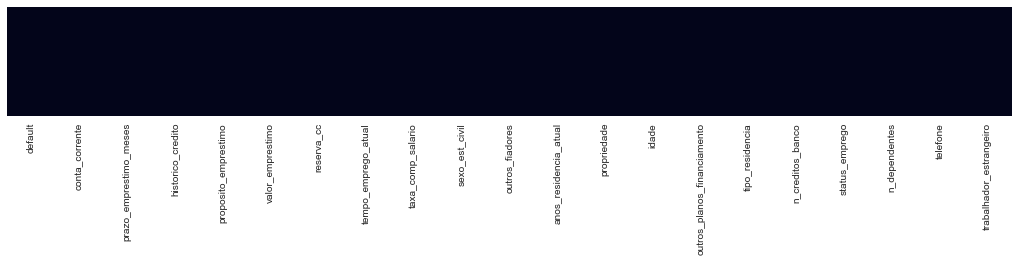

In [6]:
# Checando valores nulos
plt.figure(figsize=(18,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

In [7]:
nulos = df.isnull().sum()

print('A base de dados tem %s dados nulos' %(nulos))

A base de dados tem default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64 dados nulos


* #### Contagem de valores 0 e 1 na coluna Target

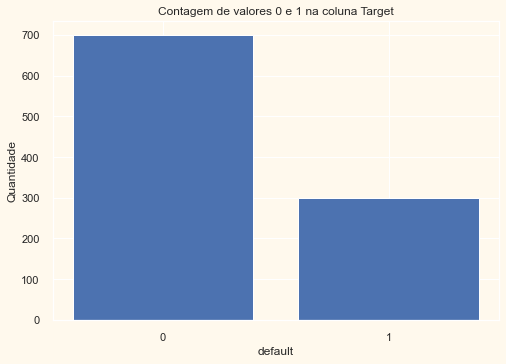

In [56]:
# contando a quantidade de 0 e 1 na coluna "target"
target_counts = df['default'].value_counts()

# criando o gráfico de barras
plt.bar(target_counts.index, target_counts.values)

# adicionando rótulos
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('default')
plt.ylabel('Quantidade')
plt.title('Contagem de valores 0 e 1 na coluna Target')

# exibindo o gráfico
plt.show()

* #### Verificando os tipos de dados:

As variáveis com valores do tipo object estão sendo utilizadas como uma faixa de range de acordo com os valores da feature. Por exemplo a feature conta_corrente em que temos:

<0 DM; <=...<=200DM; >=200DM; no checking account; salary assignments for at least 1 year.

Todas elas deverão passar pelo processo de feature engineering para que o modelo possa performar da melhor forma possível.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

Na base de dados, a maioria das features são categóricas, ou seja, passarão por transformação na etapa de feature engineering.

#### 👉 Criando a coluna de sexo

In [18]:
df['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [32]:
dic_sexo = {'male : single':'male',
            'male : divorced/separated':'male',
            'male : married/widowed':'male',
            'female : divorced/separated/married':'female'
            }

df['sexo'] = df['sexo_est_civil'].map(dic_sexo)

df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,female
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,male
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,male
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,male


In [33]:
df['sexo'].unique()

array(['male', 'female'], dtype=object)

#### 👉 Criando a coluna de emprego

In [24]:
df['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [34]:
dic_emprego = {'skilled employee / official':'sim',
               'unskilled - resident':'sim',
               'management/ self-employed/ highly qualified employee/ officer':'sim',
               'unemployed/ unskilled - non-resident':'nao'
            }

df['job'] = df['status_emprego'].map(dic_emprego)

df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,job
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male,sim
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,female,sim
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,male,sim
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,male,sim
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,male,sim


#### 👉 Criando Faixas de Idade

In [36]:
df['faixa_idade'] = pd.cut(x = df['idade'], bins = [18,30,40,50,60,70,80], labels = [1,2,3,4,5,6])
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,job,faixa_idade
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male,sim,5
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,female,sim,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,male,sim,3
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,male,sim,3
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,male,sim,4


#### 👉 Criando a coluna Faixas de empréstimo (prazo)

In [37]:
df['faixa_emprestimo'] = pd.cut(x = df['prazo_emprestimo_meses'], bins = [1,12,24,36,48,60,72], labels = [1,2,3,4,5,6])
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,job,faixa_idade,faixa_emprestimo
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male,sim,5,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,female,sim,1,4
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,male,sim,3,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,male,sim,3,4
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,male,sim,4,2


#### 👉 Criando a coluna Faixas de empréstimo (valor)

In [38]:
df['faixa_valor_emprestimo'] = pd.cut(x = df['valor_emprestimo'], 
bins = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000], 
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,job,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,male,sim,5,1,2
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,female,sim,1,4,6
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,male,sim,3,1,3
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,male,sim,3,4,8
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,male,sim,4,2,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   default                      1000 non-null   int64   
 1   conta_corrente               1000 non-null   object  
 2   prazo_emprestimo_meses       1000 non-null   int64   
 3   historico_credito            1000 non-null   object  
 4   proposito_emprestimo         1000 non-null   object  
 5   valor_emprestimo             1000 non-null   int64   
 6   reserva_cc                   1000 non-null   object  
 7   tempo_emprego_atual          1000 non-null   object  
 8   taxa_comp_salario            1000 non-null   int64   
 9   sexo_est_civil               1000 non-null   object  
 10  outros_fiadores              1000 non-null   object  
 11  anos_residencia_atual        1000 non-null   int64   
 12  propriedade                  1000 non-null   object  
 13  idad

* #### Feature Engineering

Criando uma lista com as variáveis categóricas

In [49]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

print("Variáveis caegóricas do dataset", object_cols)

Variáveis caegóricas do dataset ['conta_corrente', 'historico_credito', 'proposito_emprestimo', 'reserva_cc', 'tempo_emprego_atual', 'sexo_est_civil', 'outros_fiadores', 'propriedade', 'outros_planos_financiamento', 'tipo_residencia', 'status_emprego', 'telefone', 'trabalhador_estrangeiro', 'sexo', 'job']


Transformando em numéricas

In [51]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("Todas são numéricas agora!")

Todas são numéricas agora!


In [52]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,job,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,4,1169,4,0,4,3,2,4,2,67,1,1,2,1,1,1,1,1,1,5,1,2
1,1,0,48,3,4,5951,1,2,2,0,2,2,2,22,1,1,1,1,1,0,1,0,1,1,4,6
2,0,3,12,1,0,2096,1,3,2,3,2,3,2,49,1,1,1,3,2,0,1,1,1,3,1,3
3,0,1,42,3,7,7882,1,3,2,3,1,4,0,45,1,0,1,1,2,0,1,1,1,3,4,8
4,1,1,24,2,2,4870,1,2,3,3,2,4,3,53,1,0,2,1,2,0,1,1,1,4,2,5


* #### Data Scalling

deletando a coluna default já que não será necessária para o clustering

In [54]:
ds = df.copy()
cols_del = ['default']
ds = ds.drop(cols_del, axis=1)

In [55]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_ds.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,job,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,-0.464594,-1.236478,-1.146212,0.175588,-0.745131,1.842972,-1.339988,0.918477,0.830971,0.301109,1.046987,0.641411,2.766456,0.218346,-0.133710,1.027079,-0.289639,-0.428290,1.214598,0.196014,0.670280,0.149983,2.617306,-1.007580,-0.626287
1,-1.262865,2.248194,0.734365,0.175588,0.949817,-0.592674,0.314318,-0.870183,-1.390876,0.301109,-0.765977,0.641411,-1.191404,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014,-1.491914,0.149983,-0.904128,2.092667,0.792256
2,1.131948,-0.738668,-1.146212,-1.672702,-0.416562,-0.592674,1.141471,-0.870183,0.830971,0.301109,0.140505,0.641411,1.183312,0.218346,-0.133710,-0.704926,1.824516,2.334869,-0.823318,0.196014,0.670280,0.149983,0.856589,-1.007580,-0.271651
3,-0.464594,1.750384,0.734365,1.561805,1.634247,-0.592674,1.141471,-0.870183,0.830971,-1.945974,1.046987,-1.356755,0.831502,0.218346,-2.016956,-0.704926,-0.289639,2.334869,-0.823318,0.196014,0.670280,0.149983,0.856589,2.092667,1.501528
4,-0.464594,0.256953,-0.205923,-0.748557,0.566664,-0.592674,0.314318,0.024147,0.830971,0.301109,1.046987,1.640495,1.535122,0.218346,-2.016956,1.027079,-0.289639,2.334869,-0.823318,0.196014,0.670280,0.149983,1.736947,0.025835,0.437620


* #### Aplicando PCA

👉 Testando os dados em 2 Dimensões

In [6]:
scaled_ds_2D = scaled_ds.copy()

In [7]:
pca = PCA(n_components=2)
pca.fit(scaled_ds_2D)
PCA_ds_2D = pd.DataFrame(pca.transform(scaled_ds_2D), columns=(["col1","col2"]))
PCA_ds_2D.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,-5.331913e-14,288.819461,-499.500460,-249.750098,0.000152,249.749682,499.500644
col2,1000.0,8.881784e-18,1.913346,-3.534715,-1.383334,-0.378916,0.937017,8.158521


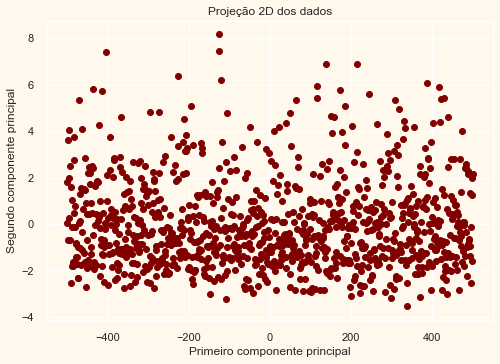

In [10]:
# plotar os dados em um gráfico de dispersão
plt.scatter(PCA_ds_2D['col1'], PCA_ds_2D['col2'], c='maroon')

# adicionar rótulos aos eixos x e y
plt.title('Projeção 2D dos dados')
plt.xlabel('Primeiro componente principal')
plt.ylabel('Segundo componente principal')

# exibir o gráfico
plt.show()

👉 Testando os dados em 3 Dimensões

In [11]:
scaled_ds_3D = scaled_ds.copy()

In [29]:
pca = PCA(n_components=3)
pca.fit(scaled_ds_3D)
PCA_ds_3D = pd.DataFrame(pca.transform(scaled_ds_3D), columns=(["col1","col2", "col3"]))
PCA_ds_3D.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1000.0,-5.331913e-14,288.819461,-499.500460,-249.750098,0.000152,249.749682,499.500644
col2,1000.0,2.664535e-17,1.913345,-3.535046,-1.382794,-0.377844,0.937358,8.158314
col3,1000.0,2.620126e-17,1.687033,-4.707197,-1.283912,-0.057751,1.081927,5.259828


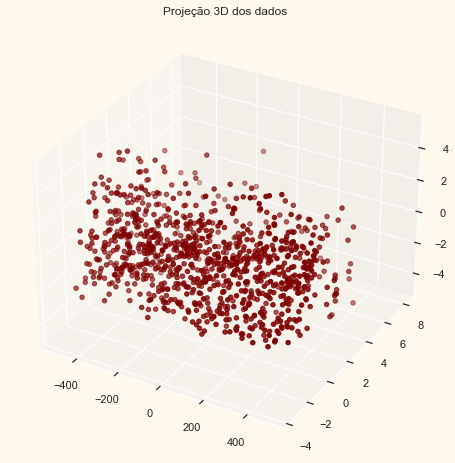

In [30]:
x =PCA_ds_3D["col1"]
y =PCA_ds_3D["col2"]
z =PCA_ds_3D["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Projeção 3D dos dados")
plt.show()

👉 Irei utilizar a visualização 3D para ver a melhor disposição dos dados

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>4) Clusterização 🤖 </h1>

👉 Para a clusterização irei utilizar o modelo K-Means

👉 No caso do modelo K-Means irei testar o k=2 (para simular o default original do dataset com os valores 0 e 1 do dataset) e um outro valor de k pelo método Elbow

* ### K-Means

Analisando o valor de k pelo método Elbow - 3D


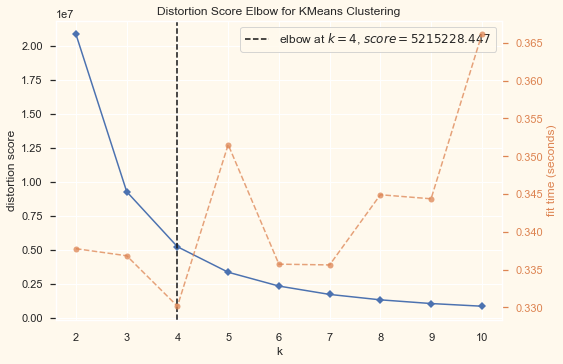

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
print('Analisando o valor de k pelo método Elbow - 3D')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds_3D)
Elbow_M.show()

👉 O valor de k escolhido foi 4 para a clusterização, utilizando o método Elbow.

### 👉 k=2

In [49]:
#Agglomerative Clustering
AC_v1 = AgglomerativeClustering(n_clusters=2)

#fit do modelo 2D
yhat_AC_3D_v1 = AC_v1.fit_predict(PCA_ds_3D)
PCA_ds_3D["Clusters"] = yhat_AC_3D_v1

#Adicionando os clusters no dataset original.
df["Clusters_k2"]= yhat_AC_3D_v1

In [50]:
PCA_ds_3D.head()

,col1,col2,col3,Clusters
0,-499.500460,0.020564,4.472321,1
1,-498.499816,1.788664,-3.660617,1
2,-497.499850,-0.686776,2.544858,1
3,-496.499237,3.609933,-0.126414,1
4,-495.500212,1.978951,3.153846,1


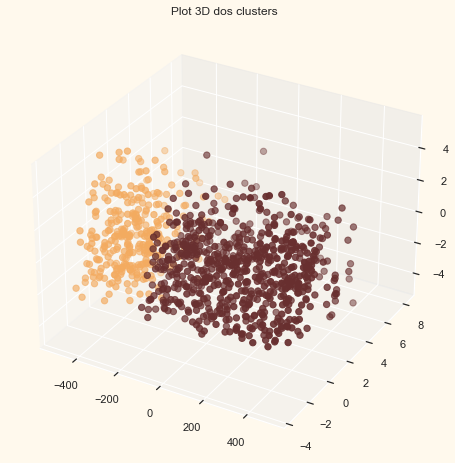

In [51]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_3D["Clusters"], marker='o', cmap = cmap )
ax.set_title("Plot 3D dos clusters")
plt.show()

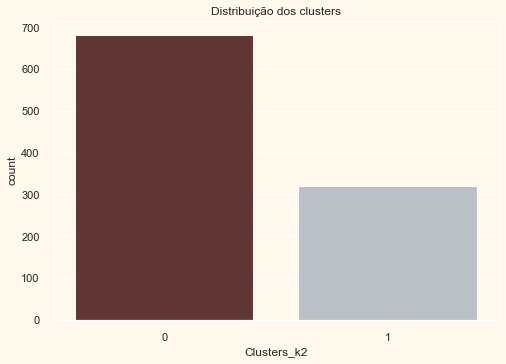

In [53]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters_k2"], palette= pal)
pl.set_title("Distribuição dos clusters")
plt.show()

👉 pelo K=2 o algoritmo K-means conseguiu chegar no número próximo de grupos do dataset original.

👉 Original: 0 (700 clientes) e 1 (300 clientes)

👉 K-Means (k=2): 0 (681 clientes) e 1 (319 clientes)

#### 👉 O algoritmo K-Means consegue segmentar os grupos de uma forma muito precisa!

### 👉 k=4

In [55]:
#Agglomerative Clustering
AC_v2 = AgglomerativeClustering(n_clusters=4)

#fit do modelo 2D
yhat_AC_3D = AC_v2.fit_predict(PCA_ds_3D)
PCA_ds_3D["Clusters"] = yhat_AC_3D

#Adicionando os clusters no dataset original.
df["Clusters_k4"]= yhat_AC_3D

In [56]:
PCA_ds_3D.head()

,col1,col2,col3,Clusters
0,-499.500460,0.020564,4.472321,0
1,-498.499816,1.788664,-3.660617,0
2,-497.499850,-0.686776,2.544858,0
3,-496.499237,3.609933,-0.126414,0
4,-495.500212,1.978951,3.153846,0


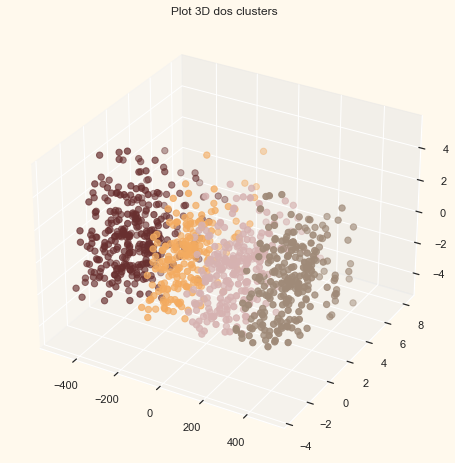

In [57]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds_3D["Clusters"], marker='o', cmap = cmap )
ax.set_title("Plot 3D dos clusters")
plt.show()

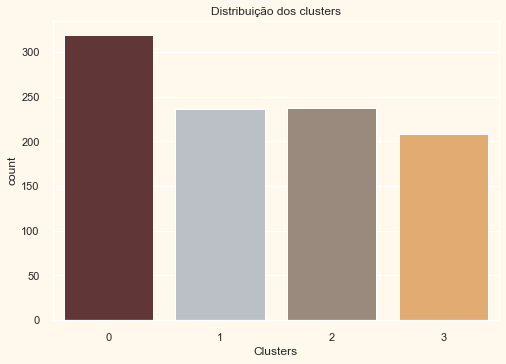

In [58]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribuição dos clusters")
plt.show()

👉 Pelo K=4 (melhor k encontrado pelo método Elbow) a clusterização do K-Means criou 4 grupos distintos

👉 Para entender melhor o comportamento destes grupos, irei realizar uma análise mais robusta para entender se posso reduzir estes 4 grupos nos 2 que são objetivos do estudo (conceder ou não crédito - 1 e 0)

* ### DBSCAN

In [154]:
dbscan_df = scaled_ds.copy()

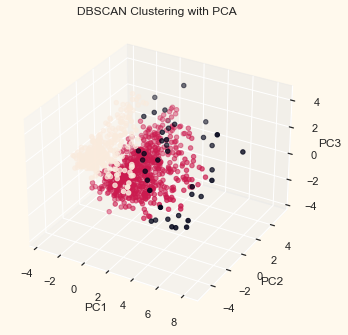

In [181]:
#Reduzindo a dimensionalidade dos dados
pca = PCA(n_components=3)
X_pca_dbscan = pca.fit_transform(dbscan_df)

# Aplicando o algoritmo DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=8)
labels = dbscan.fit_predict(X_pca_dbscan)

# Plotando os resultados em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_dbscan[:, 0], X_pca_dbscan[:, 1], X_pca_dbscan[:, 2], c=labels)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('DBSCAN Clustering with PCA')
plt.show()

In [182]:
#Colocando no df
dbscan_df['Clusters'] = labels

In [183]:
dbscan_df['Clusters'].value_counts()

 0    672
 1    289
-1     39
Name: Clusters, dtype: int64

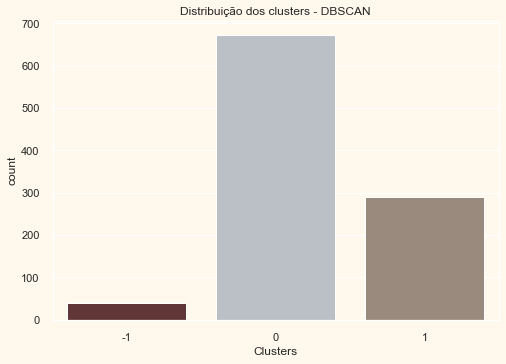

In [184]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=dbscan_df["Clusters"], palette= pal)
pl.set_title("Distribuição dos clusters - DBSCAN")
plt.show()

👉 O modelo de clusterização criado pelo DBSCAN também trouxe resultados similares ao dataset original

👉 grupo 0 (672 clientes) e grupo 1 (289 clientes), porém houve também o ruído dos dados com 39 clientes que não se encaixaram em ambos os grupos

👉 O modelo criado pelo K-Means será utilizado

<h1 style='color: blue; font-size: 30px; font-weight: bold;'> 5) Análises e Extração de Insights 💡 </h1>

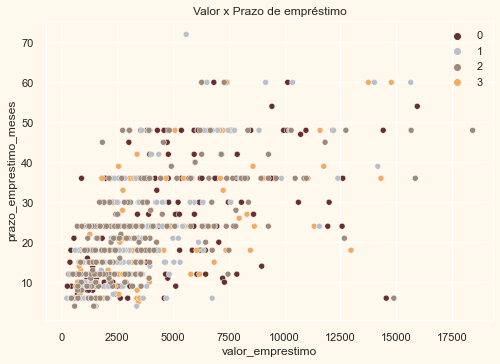

In [101]:
pl = sns.scatterplot(data = df,x = df["valor_emprestimo"], y = df["prazo_emprestimo_meses"],hue=df["Clusters_k4"], 
palette= pal)
pl.set_title("Valor x Prazo de empréstimo")
plt.legend()
plt.show()

👉 O grupo 2 está mais concentrado a pegar menores valores de empréstimos por um tempo menor

#### 👉 Emprego

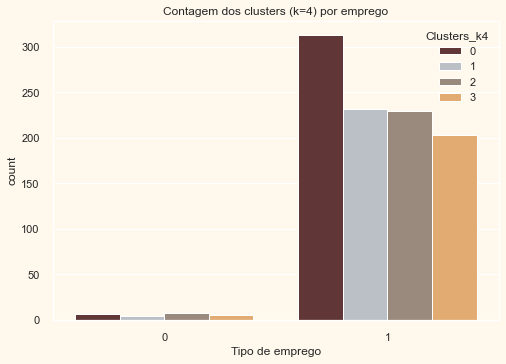

In [93]:
plt.figure()

pl = sns.countplot(x=df["job"],hue=df["Clusters_k4"], palette= pal)
pl.set_title("Contagem dos clusters (k=4) por emprego")
pl.set_xlabel("Tipo de emprego")
plt.show()

👉 A concessão de crédito ocorre em imensa maioria para clientes que possuem empregos registrados.

👉 Podemos ver que no modelo com 4 clusters, o cluster zero é o que possui clientes com a maior quantidade de empregos, e em seguida os clusters 1, 2 e 3 com quantias similares. 

#### 👉 Número de dependentes

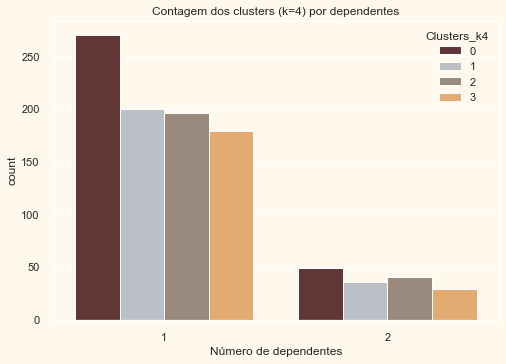

In [91]:
plt.figure()

pl = sns.countplot(x=df["n_dependentes"],hue=df["Clusters_k4"], palette= pal)
pl.set_title("Contagem dos clusters (k=4) por dependentes")
pl.set_xlabel("Número de dependentes")
plt.show()

👉 O grupo 0 possui muito mais dependentes que os outros grupos

👉 Todos os grupos possuem uma grande quantidade de 1 dependente

#### 👉 Faixa Idade

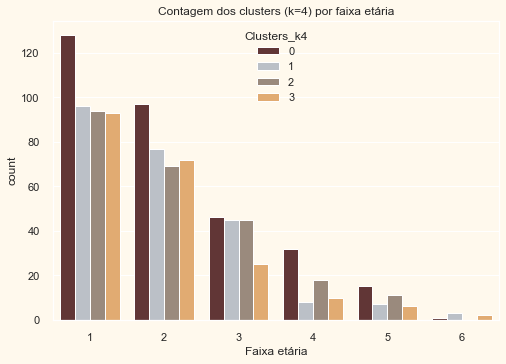

In [89]:
plt.figure()

pl = sns.countplot(x=df["faixa_idade"],hue=df["Clusters_k4"], palette= pal)
pl.set_title("Contagem dos clusters (k=4) por faixa etária")
pl.set_xlabel("Faixa etária")
plt.show()

👉 Todos os grupos possuem mais jovens do que adultos ou idosos

👉 O grupo 0 possui a maior quantidade de Jovens (18-30 anos) 

👉 O grupo 3 é o que possui menor quantidade de Adultos em relação aos outros (40-50 anos)

👉 grupo 1 é o que possui menor quantidade de idosos (>50)

#### 👉 Faixa empréstimo

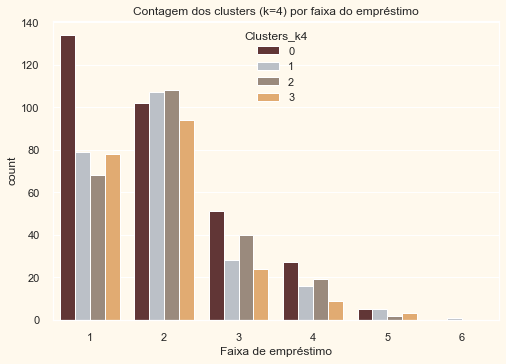

In [87]:
plt.figure()

pl = sns.countplot(x=df["faixa_emprestimo"],hue=df["Clusters_k4"], palette= pal)
pl.set_title("Contagem dos clusters (k=4) por faixa do empréstimo")
pl.set_xlabel("Faixa de empréstimo")
plt.show()

👉 O grupo 0 pega empréstimos entre 1 e 12 meses

👉 O grupo 1, 2 e 3 pegam mais empréstimos entre 12 e 24 meses

#### 👉 Faixa valor do empréstimo

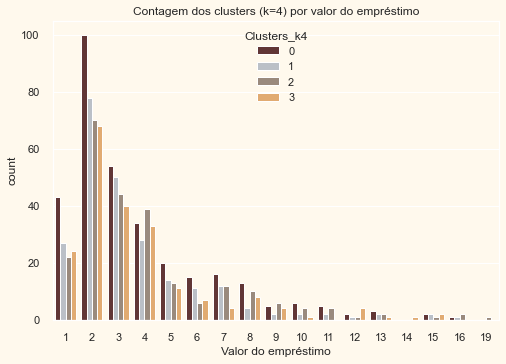

In [83]:
plt.figure()

pl = sns.countplot(x=df["faixa_valor_emprestimo"],hue=df["Clusters_k4"], palette= pal)
pl.set_title("Contagem dos clusters (k=4) por valor do empréstimo")
pl.set_xlabel("Valor do empréstimo")
plt.show()

👉 Todos os grupos pegam empréstimos entre 1000 e 2000 reais

#### 👉 Número de créditos no banco

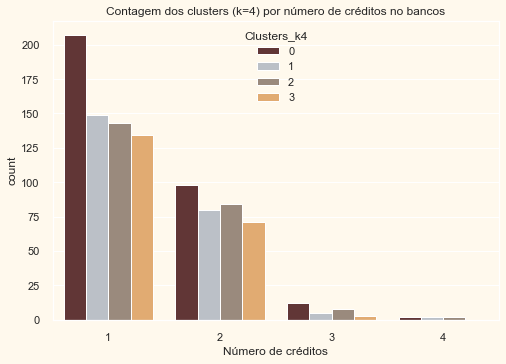

In [81]:
plt.figure()

pl = sns.countplot(x=df["n_creditos_banco"],hue=df["Clusters_k4"], palette= pal)
pl.set_title("Contagem dos clusters (k=4) por número de créditos no bancos")
pl.set_xlabel("Número de créditos")
plt.show()

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>6) Conclusão 🎉 </h1>

👉 O grupo 0 é o que está presente em maioria, os grupos 1 e 2 possuem perfis similares em relação às variáveis analisadas anteiores, e o grupo 3 é relativamente menor que o 1 e o 2.

👉 O modelo K-Means com clusterização de 4 grupos não trouxe diferenças significativas e nem vantagens em separar os grupos de 4 maneiras diferentes

👉 Já o modelo K-Means com k=2 separou os clientes da base de dados em 2 grupos de uma maneira bem similar à variável target original

👉 Com isso conclui-se que o método K-Means, quando utilizado o k=2, apresenta uma segmentação melhor para este tipo de dataset

👉 Sempre que a clusterização é necessária, é necessário entendermos qual a melhor quantidade cluster a ser construída, e neste caso, como o objetivo é apenas identificar clientes arriscados ou não, 2 clusters foram suficientes

👉 Claro que para outro dataset diferente, e com features diferentes, poderiamos ter a situação em que uma clusterização, com mais de 2 grupos, poderia apresentar um resultado melhor

👉 A clusterização é um método não supervisionado que traz uma solução de negócio e que não apresenta certo ou errado. Cada caso poderá apresentar um resultado que se adeque ou não ao problema, mas acima de tudo, o importante é que resolva o problema de negócio

👉 Neste caso conseguimos provar que o modelo K-MEANS (k=2) conseguiria resolver o problema de segmentação dos clientes na base. Se este dataset fosse entregue sem a variável target, o modelo K-MEANS se sairia muito bem.